In [1]:
import pandas as pd
import numpy as np  
import re           
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.layers.embeddings import Embedding

Using TensorFlow backend.


In [2]:
data=pd.read_csv("movie_data.csv")

In [3]:
data.head()

,review,sentiment
0,"In 1974, the teenager Martha Moxley (Maggie Gr...",1
1,OK... so... I really like Kris Kristofferson a...,0
2,"***SPOILER*** Do not read this, if you think a...",0
3,hi for all the people who have seen this wonde...,1
4,"I recently bought the DVD, forgetting just how...",0


In [4]:
data.isnull().values.any()

False

In [5]:
data.size

100000

In [6]:
data.duplicated().values.any()

True

In [7]:
data.drop_duplicates(subset=['review'],inplace=True)

In [12]:
data.size

99164

In [8]:
data.head()

,review,sentiment
0,"In 1974, the teenager Martha Moxley (Maggie Gr...",1
1,OK... so... I really like Kris Kristofferson a...,0
2,"***SPOILER*** Do not read this, if you think a...",0
3,hi for all the people who have seen this wonde...,1
4,"I recently bought the DVD, forgetting just how...",0


In [32]:
data.review.size

49582

In [9]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",

                           "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",

                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",

                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",

                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",

                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",

                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",

                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",

                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",

                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",

                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",

                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",

                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",

                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",

                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",

                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",

                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",

                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",

                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",

                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",

                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",

                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",

                           "you're": "you are", "you've": "you have"}


In [10]:
stop_words = set(stopwords.words('english')) 
def text_cleaner(text):
    newString = text.lower()
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])
    newString = re.sub(r'\[[0-9]*\]', ' ', newString)
    newString = re.sub(r'\s+', ' ', newString)
    newString = re.sub('[^a-zA-Z:]', ' ', newString)
    newString = re.sub(r'\s+', ' ', newString)
    return newString

In [11]:
cleaned_review = []
for t in data['review']:
    cleaned_review.append(text_cleaner(t))

In [12]:
data["cleaned_review"]=cleaned_review

In [13]:
data.head()

,review,sentiment,cleaned_review
0,"In 1974, the teenager Martha Moxley (Maggie Gr...",1,in the teenager martha moxley maggie grace mov...
1,OK... so... I really like Kris Kristofferson a...,0,ok so i really like kris kristofferson and his...
2,"***SPOILER*** Do not read this, if you think a...",0,spoiler do not read this if you think about w...
3,hi for all the people who have seen this wonde...,1,hi for all the people who have seen this wonde...
4,"I recently bought the DVD, forgetting just how...",0,i recently bought the dvd forgetting just how ...


In [14]:
MAX_NB_WORDS = 50000
MAX_SEQUENCE_LENGTH=500
EMBEDDING_DIM = 32

In [15]:
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~')
tokenizer.fit_on_texts(data['review'].values)
word_index = tokenizer.word_index

In [17]:
X = tokenizer.texts_to_sequences(data['review'].values)
X = sequence.pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X,data['sentiment'], test_size = 0.10, random_state = 42)

In [19]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100,dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           1600000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 500, 32)           3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 250, 32)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 1,656,405
Trainable params: 1,656,405
Non-trainable params: 0
_________________________________________________________________


In [21]:
from keras.callbacks import EarlyStopping
model.fit(X_train, Y_train, epochs=5,batch_size=64,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Train on 40160 samples, validate on 4463 samples
Epoch 1/5
40160/40160 [==============================] - 231s 6ms/step - loss: 0.3705 - accuracy: 0.8343 - val_loss: 0.2315 - val_accuracy: 0.9115
Epoch 2/5
40160/40160 [==============================] - 240s 6ms/step - loss: 0.1890 - accuracy: 0.9291 - val_loss: 0.2720 - val_accuracy: 0.8994
Epoch 3/5
40160/40160 [==============================] - 234s 6ms/step - loss: 0.1205 - accuracy: 0.9582 - val_loss: 0.3308 - val_accuracy: 0.8911
Epoch 4/5
40160/40160 [==============================] - 219s 5ms/step - loss: 0.0808 - accuracy: 0.9729 - val_loss: 0.3259 - val_accuracy: 0.8938


In [22]:
scores = model.evaluate(X_test, Y_test)
print("Accuracy: %.2f%%" % (scores[1]*100))

4959/4959 [==============================] - 5s 1ms/step
Accuracy: 89.09%


In [52]:
prob=model.predict_proba(X_test)

In [26]:
pred=model.predict_classes(X_test)

In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(pred,Y_test)

array([[2168,  273],
       [ 268, 2250]], dtype=int64)

In [31]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [33]:
auc = roc_auc_score(Y_test, prob)
auc

0.9550608946135617

In [41]:
fpr, tpr, thresholds = roc_curve(Y_test, prob)

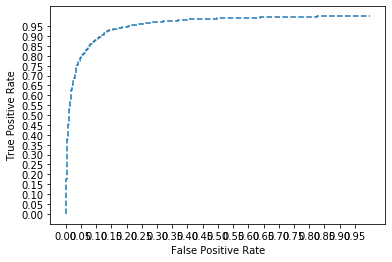

In [44]:
from matplotlib import pyplot
pyplot.plot(fpr, tpr, linestyle='--')
pyplot.xticks(np.arange(min(fpr), max(fpr), 0.05))
pyplot.yticks(np.arange(min(tpr), max(tpr), 0.05))
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.show()

In [106]:
from sklearn.metrics import precision_recall_curve
pre,rec,thre=precision_recall_curve(Y_test, prob)

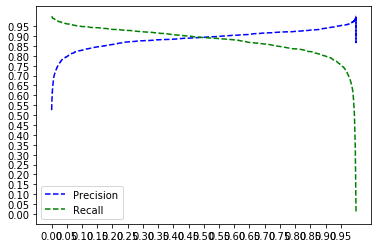

In [112]:
pyplot.plot(thre,pre[:-1],"b--",label="Precision")
pyplot.plot(thre,rec[:-1],"g--",label="Recall")
pyplot.xticks(np.arange(0, 1, 0.05))
pyplot.yticks(np.arange(0, 1, 0.05))
pyplot.xticks(np.arange(min(fpr), max(fpr), 0.05))
pyplot.legend()
pyplot.show()

In [166]:
threshold=0.875

In [167]:
pred_threshold=np.zeros((len(prob), 1))

In [168]:
for i in range(0,len(prob)):
    if prob[i,0]>threshold:
        pred_threshold[i,0]=1
    else:
        pred_threshold[i,0]=0

In [169]:
confusion_matrix(pred_threshold,Y_test)

array([[2288,  480],
       [ 148, 2043]], dtype=int64)

In [170]:
(2288+2043)/(2288+2043+148+480)

0.8733615648316193

In [147]:
new_review = ['The movie is good but it could have been better']
seq = tokenizer.texts_to_sequences(new_review)
padded = sequence.pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
prob1 = model.predict_proba(padded)
if prob1>threshold:
    pred1=1
else:
    pred1=0

In [148]:
pred1

0

In [149]:
new_review = ['The movie is very good and i have never seen a movie like this']
seq = tokenizer.texts_to_sequences(new_review)
padded = sequence.pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
prob2 = model.predict_proba(padded)
if prob2>threshold:
    pred2=1
else:
    pred2=0

In [150]:
pred2

1

In [151]:
new_review = ['though the story is good the action was not']
seq = tokenizer.texts_to_sequences(new_review)
padded = sequence.pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
prob3 = model.predict_proba(padded)
if prob3>threshold:
    pred3=1
else:
    pred3=0

In [152]:
pred3

0

In [153]:
new_review = ['the climax was a disaster']
seq = tokenizer.texts_to_sequences(new_review)
padded = sequence.pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
prob4 = model.predict_proba(padded)
if prob4>threshold:
    pred4=1
else:
    pred4=0

In [154]:
pred4

0

#### it fails to understand sarcasm

In [155]:
new_review = ['the climax is extraordinary only if you are an idiot']
seq = tokenizer.texts_to_sequences(new_review)
padded = sequence.pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
prob5 = model.predict_proba(padded)
if prob5>threshold:
    pred5=1
else:
    pred5=0

In [156]:
pred5

1

In [139]:
new_review = ['there were a lot of scenes of smoking and drinking which made the movie more worse to me']
seq = tokenizer.texts_to_sequences(new_review)
padded = sequence.pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
model.predict_proba(padded)

array([[0.17588435]], dtype=float32)